## Module 1 - Data Sources - Homework

#### Project goal
The goal of this project is to dowload financial data and conduct an analysis to answer following questions:
1. Which year had the highest number of additions? (S&P500). How many current S&P 500 stocks have been in the index for more than 20 years? 
2. How many indexes (out of 10) have better year-to-date returns than the US (S&P500) as of May 1, 2025?
- United States - S&P 500 (^GSPC)
- China - Shanghai Composite (000001.SS)
- Hong Kong - HANG SENG INDEX (^HSI)
- Australia - S&P/ASX 200 (^AXJO)
- India - Nifty 50 (^NSEI)
- Canada - S&P/TSX Composite (^GSPTSE)
- Germany - DAX (^GDAXI)
- United Kingdom - FTSE 100 (^FTSE)
- Japan - Nikkei 225 (^N225)
- Mexico - IPC Mexico (^MXX)
- Brazil - Ibovespa (^BVSP)
3. Calculate the median duration (in days) of significant market corrections in the S&P 500 index.
4. Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

In [1]:
# Dowload data
import yfinance as yf

# Data processing
import pandas as pd
import datetime as dt
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

#### Collect a list of companies included in S&P 500

In [2]:
# Load data for S&P 500 companies
sp_500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
sp_500.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

#### Download data

In [4]:
tickers = ['^GSPC','000001.SS','^HSI','^AXJO','^NSEI','^GSPTSE','^GDAXI','^FTSE','^N225','^MXX','^BVSP']

In [5]:
df = yf.download(tickers, start="2025-01-01", end="2025-05-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


In [6]:
df = df['Close'].copy()

In [7]:
df.head()

Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI  \
Date                                                                        
2025-01-01          NaN          NaN       NaN          NaN           NaN   
2025-01-02  3262.561035  8201.200195  120125.0  8260.099609  20024.660156   
2025-01-03  3211.429932  8250.500000  118533.0  8224.000000  19906.080078   
2025-01-06  3206.923096  8288.500000  120022.0  8249.700195  20216.189453   
2025-01-07  3229.644043  8285.099609  121163.0  8245.299805  20340.570312   

Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX  \
Date                                                                
2025-01-01          NaN           NaN           NaN           NaN   
2025-01-02  5868.549805  24898.000000  19623.320312  49765.199219   
2025-01-03  5942.470215  25073.500000  19760.269531  48957.238281   
2025-01-06  5975.379883  24999.800781  19688.289062  49493.558594   
2025-01-07  5909.029785  24929.900391  19447.580078  50085.500000   

Ticker             ^N225         ^NSEI  
Date                                    
2025-01-01           NaN  23742.900391  
2025-01-02           NaN  24188.650391  
2025-01-03           NaN  24004.750000  
2025-01-06  39307.050781  23616.050781  
2025-01-07  40083.300781  23707.900391

#### Prepare data for analysis

In [8]:
sp_500 = sp_500[['Symbol','Security', 'Date added']].copy()

In [9]:
# Convert 'Date added' to datetime
sp_500['Date added'] = pd.to_datetime(sp_500['Date added'])

In [10]:
# Extract year from 'Date added'
sp_500['Year'] = sp_500['Date added'].dt.year

In [11]:
sp_500.head()

Symbol             Security Date added  Year
0    MMM                   3M 1957-03-04  1957
1    AOS          A. O. Smith 2017-07-26  2017
2    ABT  Abbott Laboratories 1957-03-04  1957
3   ABBV               AbbVie 2012-12-31  2012
4    ACN            Accenture 2011-07-06  2011

#### Analysis

In [12]:
# Number of stocks added each year

sp_500_groupby_year = sp_500.groupby('Year').size().sort_values(ascending=False).head(2)
sp_500_groupby_year

Year
1957    53
2017    23
dtype: int64

In [13]:
# Stocks that have been > 20 years. (2025-20=2005)

sp_500[sp_500['Date added'] < '2005'].count()

Symbol        219
Security      219
Date added    219
Year          219
dtype: int64

#### Question 1: Which year had the highest number of additions? How many current S&P 500 stocks have been in the index for more than 20 years? 
Answer: Apart from 1957 ( as it was the year when the S&P 500 index was founded), the highest number of companies added to the index is `2017` with 23 additions. There are `219` stocks that have been more than 20 years in the index.

In [14]:
# Calculate YTD returns for each index
rets = {}

for col in df.columns:
    
    start = df[col].dropna().iloc[0]
    end = df[col].dropna().iloc[-1]
    ret = round((end/start-1)*100,2)
    rets[col] = ret
    
rets = pd.DataFrame.from_dict(rets, orient='index', columns=['YTD Return'])
rets.index.name = 'Ticker'  
rets.sort_values(by='YTD Return',ascending=False)


YTD Return
Ticker               
^MXX            13.05
^HSI            12.72
^BVSP           12.44
^GDAXI          12.35
^FTSE            2.84
^NSEI            2.49
000001.SS        0.50
^GSPTSE         -0.23
^AXJO           -0.91
^GSPC           -5.10
^N225           -8.30

#### Question 2: How many indexes (out of 10) have better year-to-date returns than the US (S&P500) as of May 1, 2025?

Answer: 9 out of 10 indexes have better year-to-date returns as of May 1, 2025.

#### Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

In [15]:
# Download S&P history since 1950
sp_500_history = yf.download('^GSPC', start='1950-01-01')

[*********************100%***********************]  1 of 1 completed


In [16]:
sp_500_history = sp_500_history['Close'].copy()

In [17]:
# Identify maximums (all-time-highs) 
sp_500_history['tops'] = sp_500_history.cummax(axis = 0)

In [18]:
tops = sp_500_history['tops']
prices = sp_500_history['^GSPC']
new_highs = tops[tops != tops.shift(1)]

In [19]:
# Identify corrections > 5%

corrections = []

# Iterate over consecutive peaks (pairs)
for i in range(len(new_highs) - 1):
    start_date = new_highs.index[i]
    end_date = new_highs.index[i + 1]
    peak_value = new_highs.iloc[i]
    
    # Period between 2 consecutive peaks
    drawdown_period = prices.loc[start_date:end_date]
    
    # correction bottom 
    min_value = drawdown_period.min()
    min_date = drawdown_period.idxmin()
    
    # Calculate drawdown %
    drawdown_pct = round((peak_value - min_value) / peak_value * 100, 2)
    
    # Correction duration in days (from top to bottom)
    duration = (min_date - start_date).days
    
    # Filter drawdowns > 5%
    if drawdown_pct >= 5:
        corrections.append({
            'Start (peak)': start_date.date(),
            'Duration [days]': duration,
            'Max drawdown %': drawdown_pct,
            'Bottom date': min_date.date()
        })

# Create dataframe
corrections_df = pd.DataFrame(corrections)

In [20]:
corrections_df['Start (peak)'] = pd.to_datetime(corrections_df['Start (peak)'])
corrections_df['Bottom date'] = pd.to_datetime(corrections_df['Bottom date'])

In [21]:
# Top 10 corrections by max drawdown
corrections_df.sort_values('Max drawdown %', ascending = False).head(10)

Start (peak)  Duration [days]  Max drawdown % Bottom date
56   2007-10-09              517           56.78  2009-03-09
54   2000-03-24              929           49.15  2002-10-09
24   1973-01-11              630           48.20  1974-10-03
22   1968-11-29              543           36.06  1970-05-26
65   2020-02-19               33           33.92  2020-03-23
35   1987-08-25              101           33.51  1987-12-04
15   1961-12-12              196           27.97  1962-06-26
27   1980-11-28              622           27.11  1982-08-12
68   2022-01-03              282           25.43  2022-10-12
18   1966-02-09              240           22.18  1966-10-07

In [22]:
corrections_df['Duration [days]'].median()

39.0

In [23]:
corrections_df['Duration [days]'].describe()

count     71.000000
mean     113.112676
std      179.099856
min        7.000000
25%       21.500000
50%       39.000000
75%       89.000000
max      929.000000
Name: Duration [days], dtype: float64

#### Question 3: Calculate the median duration (in days) of significant market corrections in the S&P 500 index
Answer: The median duration of the corrections > 5% is 39 days.

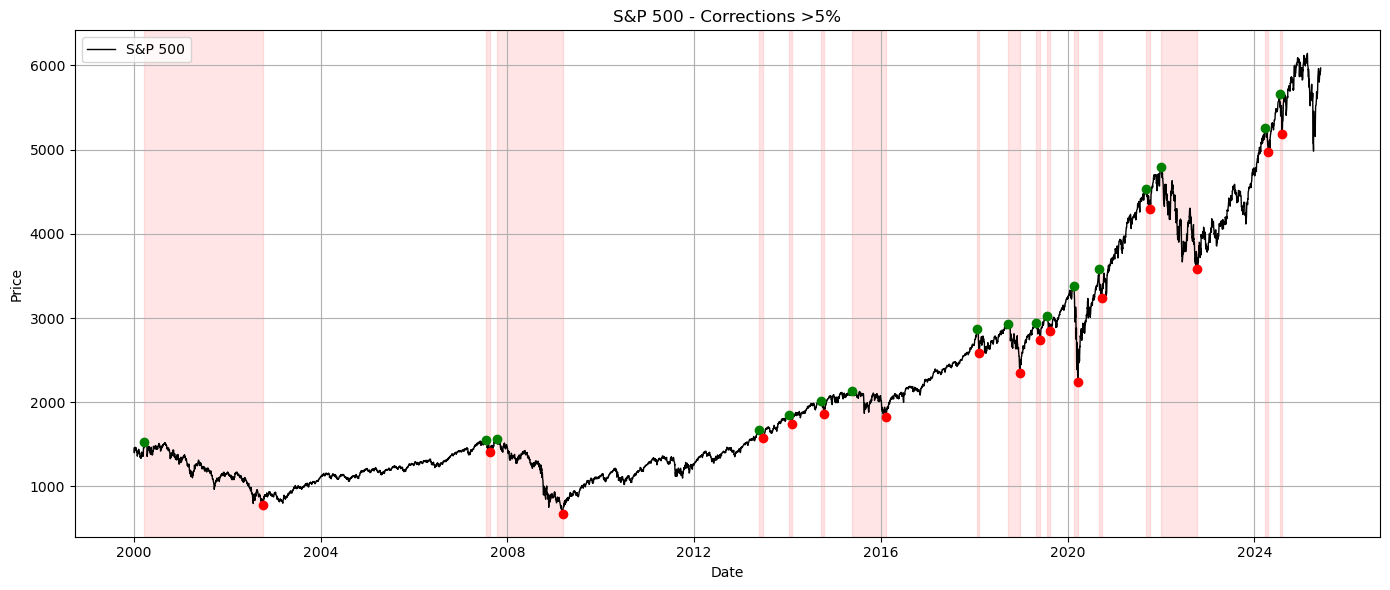

In [24]:
# Visualize corrections > 5%

# Filter data to zoom in/out the chart
start_date = '2000'
end_date = '2025'


sp_500_filtered = sp_500_history['^GSPC'].loc[start_date:end_date]
corrections_filtered = corrections_df[
    (corrections_df['Start (peak)'] >= pd.to_datetime(start_date)) &
    (corrections_df['Bottom date'] <= pd.to_datetime(end_date))
]

# Plot the corrections
plt.figure(figsize=(14, 6))
plt.plot(sp_500_filtered, label='S&P 500', color='black', linewidth=1)

for i, row in corrections_filtered.iterrows():
    start = row['Start (peak)']
    bottom = row['Bottom date']

    plt.axvspan(start, bottom, color='red', alpha=0.1)
    plt.plot(start, sp_500_history.at[start, '^GSPC'], 'go', label='Peak' if i == 0 else "")
    plt.plot(bottom, sp_500_history.at[bottom, '^GSPC'], 'ro', label='Bottom' if i == 0 else "")

plt.title(f"S&P 500 - Corrections >5%")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Load csv file with Amazon earnings and prcie history from yahoo finance

amazon = pd.read_csv('ha1_Amazon.csv', sep=';')

In [26]:
amazon['EPS Estimate'] = pd.to_numeric(amazon['EPS Estimate'], errors='coerce')
amazon['Reported EPS'] = pd.to_numeric(amazon['Reported EPS'], errors='coerce')

In [27]:
amazon.dtypes

Symbol            object
Company           object
Earnings Date     object
EPS Estimate     float64
Reported EPS     float64
Surprise (%)      object
dtype: object

In [28]:
amazon[amazon['Reported EPS'] > amazon['EPS Estimate']].shape

(33, 6)

In [29]:
# Clean 'Earnings Date'
amazon['Earnings Date'] = (
    amazon['Earnings Date']
    .str.replace(r'\s+(EDT|EST|PDT|UTC)', '', regex=True) 
    .str.strip()                                         
)

In [30]:
# Covert to datetime and removing timestamp
amazon['Earnings Date'] = pd.to_datetime(amazon['Earnings Date'], errors='coerce').dt.normalize()

In [31]:
AMZN = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed


In [32]:
AMZN = AMZN['Close'].copy()

In [33]:
AMZN

Ticker            AMZN
Date                  
1997-05-15    0.097917
1997-05-16    0.086458
1997-05-19    0.085417
1997-05-20    0.081771
1997-05-21    0.071354
...                ...
2025-05-28  204.720001
2025-05-29  205.699997
2025-05-30  205.009995
2025-06-02  206.649994
2025-06-03  205.710007

[7057 rows x 1 columns]

In [34]:
# Create a new feature which represent 2-day returns forward (2 days ahead)
AMZN['2_day_pct_forward'] = (AMZN['AMZN'].shift(-1) - AMZN['AMZN'].shift(1)) / AMZN['AMZN'].shift(1)

In [35]:
AMZN.head()

Ticker          AMZN  2_day_pct_forward
Date                                   
1997-05-15  0.097917                NaN
1997-05-16  0.086458          -0.127659
1997-05-19  0.085417          -0.054211
1997-05-20  0.081771          -0.164639
1997-05-21  0.071354          -0.146494

In [36]:
# Merge both tables on dates

merged_df = pd.merge(
    AMZN.reset_index(), 
    amazon, 
    left_on='Date', 
    right_on='Earnings Date', 
    how='left'
).set_index('Date').sort_index()


In [37]:
# Remove "Surprise (%)" column
merged_df.drop(columns=['Surprise (%)'], inplace=True)

In [38]:
merged_df.head()

AMZN  2_day_pct_forward Symbol Company Earnings Date  \
Date                                                                   
1997-05-15  0.097917                NaN    NaN     NaN           NaT   
1997-05-16  0.086458          -0.127659    NaN     NaN           NaT   
1997-05-19  0.085417          -0.054211    NaN     NaN           NaT   
1997-05-20  0.081771          -0.164639    NaN     NaN           NaT   
1997-05-21  0.071354          -0.146494    NaN     NaN           NaT   

            EPS Estimate  Reported EPS  
Date                                    
1997-05-15           NaN           NaN  
1997-05-16           NaN           NaN  
1997-05-19           NaN           NaN  
1997-05-20           NaN           NaN  
1997-05-21           NaN           NaN

In [39]:
merged_df.notnull().sum()

AMZN                 7057
2_day_pct_forward    7055
Symbol                112
Company               112
Earnings Date         112
EPS Estimate           84
Reported EPS           92
dtype: int64

In [40]:
positive = merged_df.loc[merged_df['Reported EPS']>merged_df['EPS Estimate']] 
positive # 33 positive surprises (merged correctly).

AMZN  2_day_pct_forward Symbol           Company  \
Date                                                                 
2006-02-02    2.137000          -0.128467   AMZN  Amazon.com, Inc.   
2008-07-23    3.527000           0.158158   AMZN  Amazon.com, Inc.   
2009-01-29    2.500000           0.167991   AMZN  Amazon.com, Inc.   
2010-10-21    8.248500           0.065923   AMZN  Amazon.com, Inc.   
2011-01-27    9.222500          -0.024232   AMZN  Amazon.com, Inc.   
2012-01-31    9.722000          -0.066042   AMZN  Amazon.com, Inc.   
2015-01-29   15.589000           0.166562   AMZN  Amazon.com, Inc.   
2015-07-23   24.108999           0.084277   AMZN  Amazon.com, Inc.   
2015-10-22   28.195499           0.077838   AMZN  Amazon.com, Inc.   
2016-04-28   30.100000           0.087409   AMZN  Amazon.com, Inc.   
2016-07-28   37.630501           0.030054   AMZN  Amazon.com, Inc.   
2017-02-02   41.997501          -0.026611   AMZN  Amazon.com, Inc.   
2017-04-27   45.918999           0.017266   AMZN  Amazon.com, Inc.   
2018-02-01   69.500000          -0.014433   AMZN  Amazon.com, Inc.   
2018-04-26   75.898003           0.077012   AMZN  Amazon.com, Inc.   
2018-07-26   90.400002          -0.024866   AMZN  Amazon.com, Inc.   
2018-10-25   89.108498          -0.012853   AMZN  Amazon.com, Inc.   
2019-01-31   85.936501          -0.026460   AMZN  Amazon.com, Inc.   
2019-04-25   95.112503           0.025703   AMZN  Amazon.com, Inc.   
2020-01-30   93.533997           0.081119   AMZN  Amazon.com, Inc.   
2020-07-30  152.593994           0.043233   AMZN  Amazon.com, Inc.   
2020-10-29  160.550507          -0.040038   AMZN  Amazon.com, Inc.   
2021-02-02  169.000000          -0.009079   AMZN  Amazon.com, Inc.   
2021-04-29  173.565506           0.002579   AMZN  Amazon.com, Inc.   
2021-07-29  179.996002          -0.083389   AMZN  Amazon.com, Inc.   
2022-02-03  138.845505           0.046656   AMZN  Amazon.com, Inc.   
2022-07-28  122.279999           0.115566   AMZN  Amazon.com, Inc.   
2023-02-02  112.910004          -0.016738   AMZN  Amazon.com, Inc.   
2023-04-27  109.820000           0.004477   AMZN  Amazon.com, Inc.   
2023-08-03  128.910004           0.088605   AMZN  Amazon.com, Inc.   
2023-10-26  119.570000           0.052311   AMZN  Amazon.com, Inc.   
2024-02-01  159.279999           0.107023   AMZN  Amazon.com, Inc.   
2024-04-30  175.000000          -0.010831   AMZN  Amazon.com, Inc.   

           Earnings Date  EPS Estimate  Reported EPS  
Date                                                  
2006-02-02    2006-02-02          0.01          0.02  
2008-07-23    2008-07-23          0.01          0.02  
2009-01-29    2009-01-29          0.02          0.03  
2010-10-21    2010-10-21          0.02          0.03  
2011-01-27    2011-01-27          0.04          0.05  
2012-01-31    2012-01-31          0.01          0.02  
2015-01-29    2015-01-29          0.01          0.02  
2015-07-23    2015-07-23         -0.01          0.01  
2015-10-22    2015-10-22         -0.01          0.01  
2016-04-28    2016-04-28          0.03          0.05  
2016-07-28    2016-07-28          0.06          0.09  
2017-02-02    2017-02-02          0.07          0.08  
2017-04-27    2017-04-27          0.05          0.07  
2018-02-01    2018-02-01          0.09          0.11  
2018-04-26    2018-04-26          0.06          0.16  
2018-07-26    2018-07-26          0.13          0.25  
2018-10-25    2018-10-25          0.16          0.29  
2019-01-31    2019-01-31          0.28          0.30  
2019-04-25    2019-04-25          0.24          0.35  
2020-01-30    2020-01-30          0.20          0.32  
2020-07-30    2020-07-30          0.07          0.52  
2020-10-29    2020-10-29          0.37          0.62  
2021-02-02    2021-02-02          0.36          0.70  
2021-04-29    2021-04-29          0.48          0.79  
2021-07-29    2021-07-29          0.62          0.76  
2022-02-03    2022-02-03          0.18          0.29  
2022-07-28    2022-07-28   

In [41]:
positive['2_day_pct_forward'].median()

0.02570264445822534

In [42]:
merged_df['2_day_pct_forward'].median()

0.001653815305118935

#### Question 4: Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.
Answer : Median 2-day % change in price following positive earnings is 2,57% and is significantly bigger than 2-day percentage change for all historical dates (0,165%).

*** Is there a `correlation` between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during `bull vs. bear markets`?

In [43]:
merged_df['magnitude'] = merged_df['Reported EPS'] - merged_df['EPS Estimate']

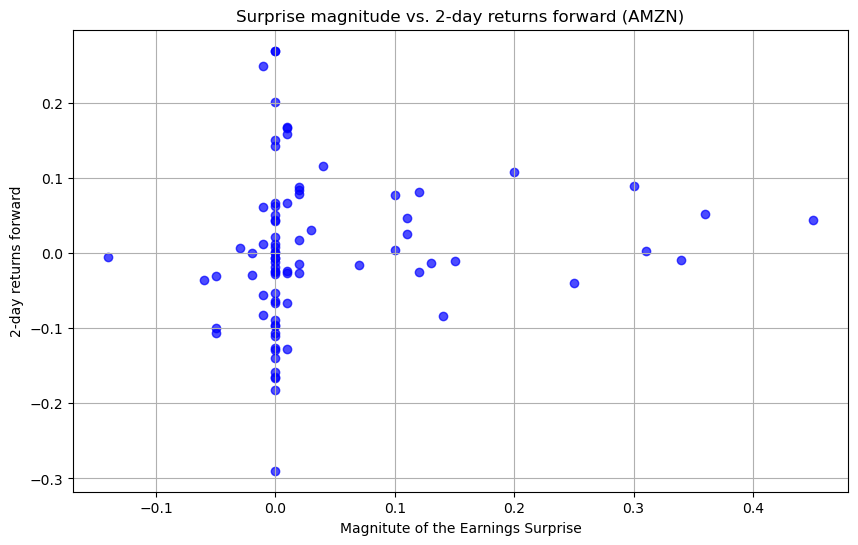

In [44]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['magnitude'], merged_df['2_day_pct_forward'], color='blue', alpha=0.7)

plt.title("Surprise magnitude vs. 2-day returns forward (AMZN)")
plt.xlabel("Magnitute of the Earnings Surprise")
plt.ylabel("2-day returns forward")
plt.grid(True)
plt.show()

In [45]:
# Calculate correlation
correlation = merged_df['magnitude'].corr(merged_df['2_day_pct_forward'])
print(f"Correlation between 'magnitude' and '2_day_pct_forward': {correlation:.4f}")

Correlation between 'magnitude' and '2_day_pct_forward': 0.1275


#### Market reaction to earnings during bull vs. bear market

Official bear market is when price is below -20% from last ATH

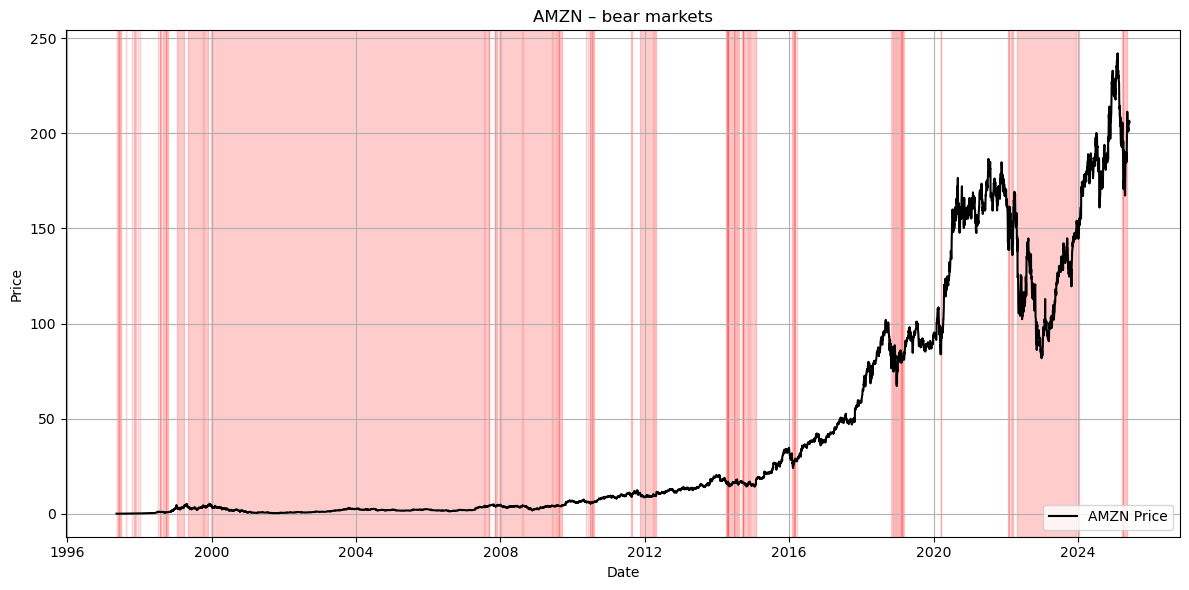

In [46]:
# Calculate peaks and drawdowns
merged_df['Peak'] = merged_df['AMZN'].cummax()
merged_df['Drawdown'] = (merged_df['AMZN'] -merged_df['Peak']) / merged_df['Peak']

# Identify drawdowns ≥20% and create sequences of bull/bear markets
mask =merged_df['Drawdown'] <= -0.20
merged_df['segment'] = (mask != mask.shift()).cumsum()

# Pull out bear market sequences (date ranges)
segments = merged_df[mask] \
    .groupby('segment') \
    .apply(lambda grp: (grp.index[0], grp.index[-1])) \
    .tolist()

# Create a list of dictionaries with bear markets
bear_periods = []
for start, end in segments:
    seg_df = merged_df.loc[start:end]
    bear_periods.append({
        'Start':        start,
        'End':          end,
        'Duration':     (end - start).days,
        'Max Drawdown': seg_df['Drawdown'].min()
    })

# Save the list to dataframe
bear_periods_df = pd.DataFrame(bear_periods)
bear_periods_df.index.name = 'Period #'

# sort by drawdown size
bear_periods_df = bear_periods_df.sort_values('Max Drawdown')
bear_periods_df = bear_periods_df.dropna(subset=['Start', 'End'])

# PLot the periods when price is below -20% from the last ATH
plt.figure(figsize=(12,6))
plt.plot(merged_df['AMZN'], label='AMZN Price', color='black')
for _, row in bear_periods_df.iterrows():
    plt.axvspan(row['Start'], row['End'], color='red', alpha=0.2)
plt.title('AMZN – bear markets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
bear_periods_df

Start        End  Duration  Max Drawdown
Period #                                              
19       2000-01-04 2007-07-24      2758     -0.944042
26       2008-08-18 2009-06-02       288     -0.671658
16       1999-05-03 1999-10-06       156     -0.593099
77       2022-04-21 2023-12-14       602     -0.561453
15       1999-01-14 1999-03-26        71     -0.515234
...             ...        ...       ...           ...
24       2007-12-17 2007-12-17         0     -0.202437
31       2010-05-20 2010-05-20         0     -0.202412
61       2018-11-05 2018-11-05         0     -0.201867
63       2018-12-07 2018-12-07         0     -0.201215
44       2014-06-17 2014-06-17         0     -0.200049

[82 rows x 4 columns]

In [48]:
# Create new feature to distinguish between bull and bear markets
merged_df['in_bear'] = False # set False as default

In [49]:
# Iterate over bear periods and update the 'in_bear' feature in merged_df
for _, row in bear_periods_df.iterrows():
    start, end = row['Start'], row['End']
    merged_df.loc[start:end, 'in_bear'] = True


In [50]:
merged_df

AMZN  2_day_pct_forward Symbol Company Earnings Date  \
Date                                                                     
1997-05-15    0.097917                NaN    NaN     NaN           NaT   
1997-05-16    0.086458          -0.127659    NaN     NaN           NaT   
1997-05-19    0.085417          -0.054211    NaN     NaN           NaT   
1997-05-20    0.081771          -0.164639    NaN     NaN           NaT   
1997-05-21    0.071354          -0.146494    NaN     NaN           NaT   
...                ...                ...    ...     ...           ...   
2025-05-28  204.720001          -0.001553    NaN     NaN           NaT   
2025-05-29  205.699997           0.001417    NaN     NaN           NaT   
2025-05-30  205.009995           0.004618    NaN     NaN           NaT   
2025-06-02  206.649994           0.003415    NaN     NaN           NaT   
2025-06-03  205.710007                NaN    NaN     NaN           NaT   

            EPS Estimate  Reported EPS  magnitude        Peak  Drawdown  \
Date                                                                      
1997-05-15           NaN           NaN        NaN    0.097917  0.000000   
1997-05-16           NaN           NaN        NaN    0.097917 -0.117028   
1997-05-19           NaN           NaN        NaN    0.097917 -0.127659   
1997-05-20           NaN           NaN        NaN    0.097917 -0.164895   
1997-05-21           NaN           NaN        NaN    0.097917 -0.271281   
...                  ...           ...        ...         ...       ...   
2025-05-28           NaN           NaN        NaN  242.059998 -0.154259   
2025-05-29           NaN           NaN        NaN  242.059998 -0.150211   
2025-05-30           NaN           NaN        NaN  242.059998 -0.153061   
2025-06-02           NaN           NaN        NaN  242.059998 -0.146286   
2025-06-03           NaN           NaN        NaN  242.059998 -0.150169   

            segment  in_bear  
Date                          
1997-05-15        1    False  
1997-05-16        1    False  
1997-05-19        1    False  
1997-05-20        1    False  
1997-05-21        2     True  
...             ...      ...  
2025-05-28      165    False  
2025-05-29      165    False  
2025-05-30      165    False  
2025-06-02      165    False  
2025-06-03      165    False  

[7057 rows x 12 columns]

In [51]:
# Filter rows with earnings events
bull_vs_bear = merged_df[merged_df['magnitude'].notnull()]

In [52]:
bull_vs_bear

AMZN  2_day_pct_forward Symbol           Company  \
Date                                                                 
1999-04-28    4.837500          -0.182756   AMZN  Amazon.com, Inc.   
1999-07-21    3.135938          -0.110822   AMZN  Amazon.com, Inc.   
1999-10-27    3.796875          -0.126154   AMZN  Amazon.com, Inc.   
2000-02-02    3.471875           0.248378   AMZN  Amazon.com, Inc.   
2000-04-26    2.675000           0.008343   AMZN  Amazon.com, Inc.   
...                ...                ...    ...               ...   
2023-04-27  109.820000           0.004477   AMZN  Amazon.com, Inc.   
2023-08-03  128.910004           0.088605   AMZN  Amazon.com, Inc.   
2023-10-26  119.570000           0.052311   AMZN  Amazon.com, Inc.   
2024-02-01  159.279999           0.107023   AMZN  Amazon.com, Inc.   
2024-04-30  175.000000          -0.010831   AMZN  Amazon.com, Inc.   

           Earnings Date  EPS Estimate  Reported EPS  magnitude        Peak  \
Date                                                                          
1999-04-28    1999-04-28         -0.01         -0.01       0.00    5.253125   
1999-07-21    1999-07-21         -0.01         -0.01       0.00    5.253125   
1999-10-27    1999-10-27         -0.01         -0.01       0.00    5.253125   
2000-02-02    2000-02-02         -0.02         -0.03      -0.01    5.334375   
2000-04-26    2000-04-26         -0.02         -0.02       0.00    5.334375   
...                  ...           ...           ...        ...         ...   
2023-04-27    2023-04-27          0.21          0.31       0.10  186.570496   
2023-08-03    2023-08-03          0.35          0.65       0.30  186.570496   
2023-10-26    2023-10-26          0.58          0.94       0.36  186.570496   
2024-02-01    2024-02-01          0.80          1.00       0.20  186.570496   
2024-04-30    2024-04-30          0.83          0.98       0.15  189.050003   

            Drawdown  segment  in_bear  
Date                                    
1999-04-28 -0.079120       33    False  
1999-07-21 -0.403034       34     True  
1999-10-27 -0.277216       36     True  
2000-02-02 -0.349151       40     True  
2000-04-26 -0.498535       40     True  
...              ...      ...      ...  
2023-04-27 -0.411375      156     True  
2023-08-03 -0.309055      156     True  
2023-10-26 -0.359116      156     True  
2024-02-01 -0.146274      159    False  
2024-04-30 -0.074319      159    False  

[84 rows x 12 columns]

In [53]:
count_in  = bull_vs_bear['in_bear'].sum() # number of earning events during bear market
count_out = (~bull_vs_bear['in_bear']).sum() # number of earning events during bull market
print(f"number of earning events during bear market: {count_in}")
print(f"number of earning events during bull market: {count_out}")

number of earning events during bear market: 41
number of earning events during bull market: 43


#### Market reaction to earnings surprises during bear and bull markets 
There are 4 possible cases (excluding rows where magnitude == 0 -> no surprise):
- bear market + positive earnings
- bear market + negative earnings
- bull market + positive earnings
- bull market and negative earnings

In [54]:
bull_vs_bear[(bull_vs_bear['in_bear'] == True) & (bull_vs_bear['magnitude'] > 0)]['2_day_pct_forward'].median()

0.05231072169082317

In [55]:
bull_vs_bear[(bull_vs_bear['in_bear'] == False) & (bull_vs_bear['magnitude'] > 0)]['2_day_pct_forward'].median()

0.009922681502321274

In [56]:
bull_vs_bear[(bull_vs_bear['in_bear'] == True) & (bull_vs_bear['magnitude'] < 0)]['2_day_pct_forward'].median()

-0.08278753354482352

In [57]:
bull_vs_bear[(bull_vs_bear['in_bear'] == False) & (bull_vs_bear['magnitude'] < 0)]['2_day_pct_forward'].median()

-0.01739066023493478

The medians of 2-day returns following the earning events show that there is significant impact of the news when we're in bear market and earnings below expectations (-8,3%). Also when we're in bear market and earnings are positive (5,2%).